# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [3415]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import copy
import scipy
from sklearn.preprocessing import FunctionTransformer

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import xgboost as xgb

from sklearn import metrics 
from sklearn.metrics import roc_auc_score, f1_score
import pickle

In [2997]:
data_pipe = pd.read_csv("data.csv", header = 0) 

In [2998]:
data = pd.read_csv("data.csv", header = 0) 
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [2999]:
data.shape

(614, 13)

### Nan

One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [3000]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


In [3001]:
data['Dependents'] = np.where(data['Dependents']=='0',0,
                             np.where(data['Dependents']=='1',1, 
                             np.where(data['Dependents']=='2',2, 
                             np.where(data['Dependents']=='3+',3, data['Dependents']))))

### Splitting into Numerical and categorical

In [3002]:
#data.dtypes

In [3003]:
#data['Credit_History'] = data['Credit_History'].astype('object')

In [3004]:
numerical = list(data.dtypes[data.dtypes != 'object'].index)
categorical = list(data.dtypes[data.dtypes == 'object'].index)

### Numerical

Look at some basic statistics for numerical variables.

In [3005]:
data[numerical]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



In [3006]:
# 1
data.groupby('Credit_History').count()['Loan_ID']

Credit_History
0.0     89
1.0    475
Name: Loan_ID, dtype: int64

Text(0.5, 1.0, 'Credit history = 0')

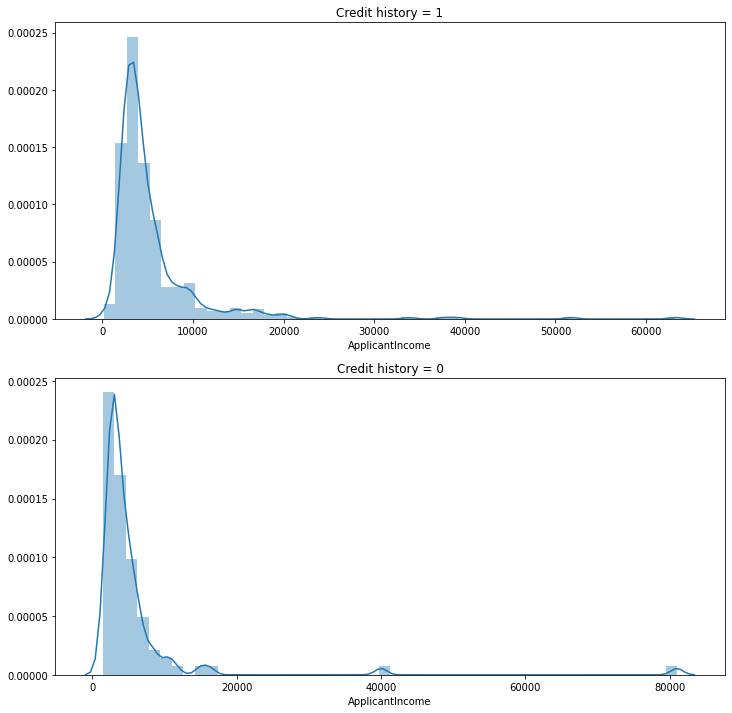

In [3007]:
fig, ax = plt.subplots(2,figsize=(12,12))
sns.distplot(data[data['Credit_History']==1]['ApplicantIncome'], ax = ax[0])
sns.distplot(data[data['Credit_History']==0]['ApplicantIncome'], ax = ax[1])
ax[0].set_title('Credit history = 1')
ax[1].set_title('Credit history = 0')

Text(0.5, 1.0, 'Credit history = 0')

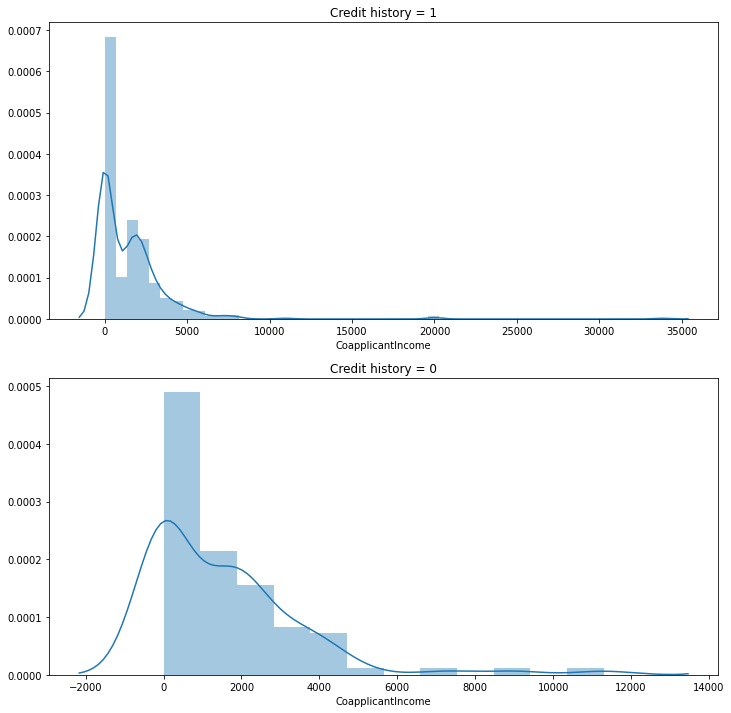

In [3008]:
fig, ax = plt.subplots(2,figsize=(12,12))
sns.distplot(data[data['Credit_History']==1]['CoapplicantIncome'], ax = ax[0])
sns.distplot(data[data['Credit_History']==0]['CoapplicantIncome'], ax = ax[1])
ax[0].set_title('Credit history = 1')
ax[1].set_title('Credit history = 0')

In [3011]:
#Applicant income
print(data[data['Credit_History']==1]['ApplicantIncome'].mean())
print(data[data['Credit_History']==1]['ApplicantIncome'].mode()[0], '\n')

print(data[data['Credit_History']==0]['ApplicantIncome'].mean())
print(data[data['Credit_History']==0]['ApplicantIncome'].mode()[0])

5426.526315789473
2500 

5679.438202247191
4166


In [3012]:
#Co-Applicant income
print(data[data['Credit_History']==1]['CoapplicantIncome'].mean())
print(data[data['Credit_History']==1]['CoapplicantIncome'].mode()[0], '\n')

print(data[data['Credit_History']==0]['CoapplicantIncome'].mean())
print(data[data['Credit_History']==0]['CoapplicantIncome'].mode()[0])

1528.250357870821
0.0 

1542.1797752808989
0.0


### Categorical

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [3013]:
data[categorical]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [3014]:
print(data['Gender'].unique())
print(data['Married'].unique())
print(data['Dependents'].unique())
print(data['Education'].unique())
print(data['Self_Employed'].unique())
print(data['Property_Area'].unique())
print(data['Loan_Status'].unique())

['Male' 'Female' nan]
['No' 'Yes' nan]
[0 1 2 3 nan]
['Graduate' 'Not Graduate']
['No' 'Yes' nan]
['Urban' 'Rural' 'Semiurban']
['Y' 'N']


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

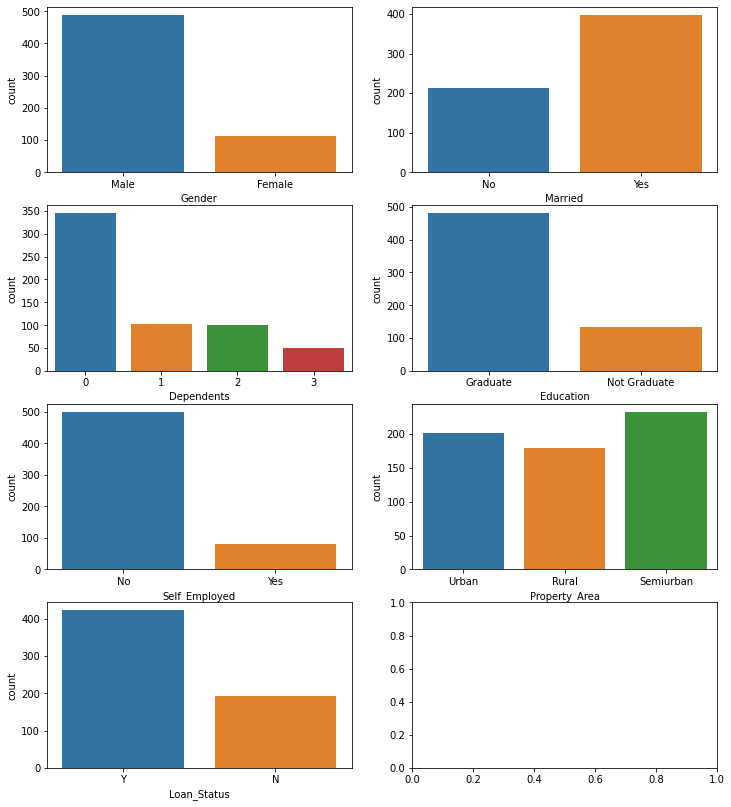

In [3015]:
fig, ax = plt.subplots(4,2,figsize=(12,14))
sns.countplot(data['Gender'], ax = ax[0][0])
sns.countplot(data['Married'], ax = ax[0][1])
sns.countplot(data['Dependents'], ax = ax[1][0])
sns.countplot(data['Education'], ax = ax[1][1])
sns.countplot(data['Self_Employed'], ax = ax[2][0])
sns.countplot(data['Property_Area'], ax = ax[2][1])
sns.countplot(data['Loan_Status'], ax = ax[3][0])

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



<AxesSubplot:xlabel='ApplicantIncome'>

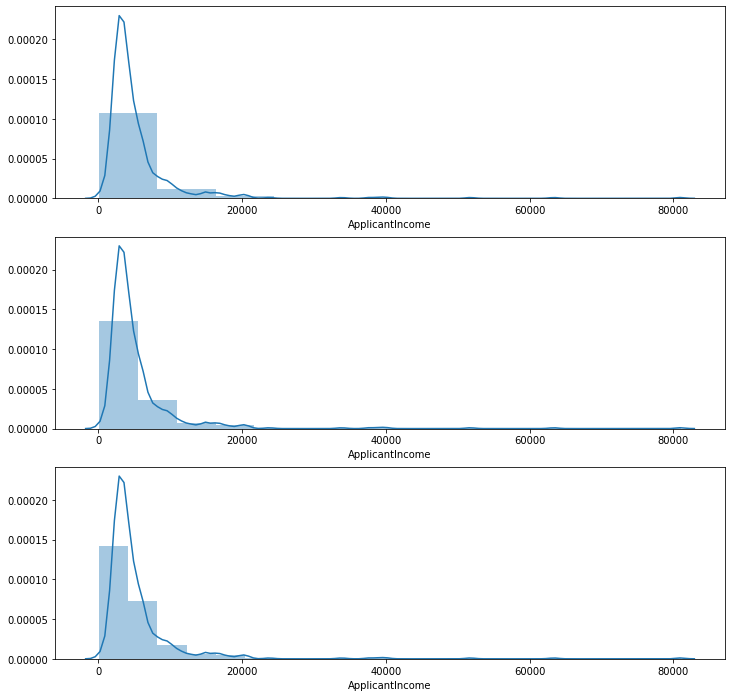

In [3016]:
fig, ax = plt.subplots(3,figsize=(12,12))
sns.distplot(data['ApplicantIncome'],bins = 10, ax = ax[0])
sns.distplot(data['ApplicantIncome'],bins = 15, ax = ax[1])
sns.distplot(data['ApplicantIncome'],bins = 20, ax = ax[2])


Look at box plots to understand the distributions. 

<AxesSubplot:xlabel='LoanAmount'>

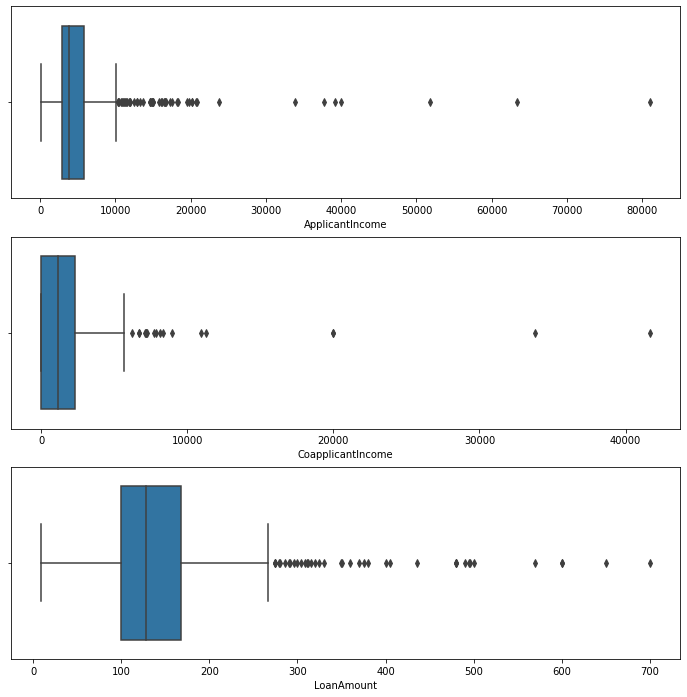

In [3017]:
fig, ax = plt.subplots(3,figsize=(12,12))
sns.boxplot(data['ApplicantIncome'], ax = ax[0])
sns.boxplot(data['CoapplicantIncome'], ax = ax[1])
sns.boxplot(data['LoanAmount'], ax = ax[2])

Look at the distribution of income segregated  by `Education`

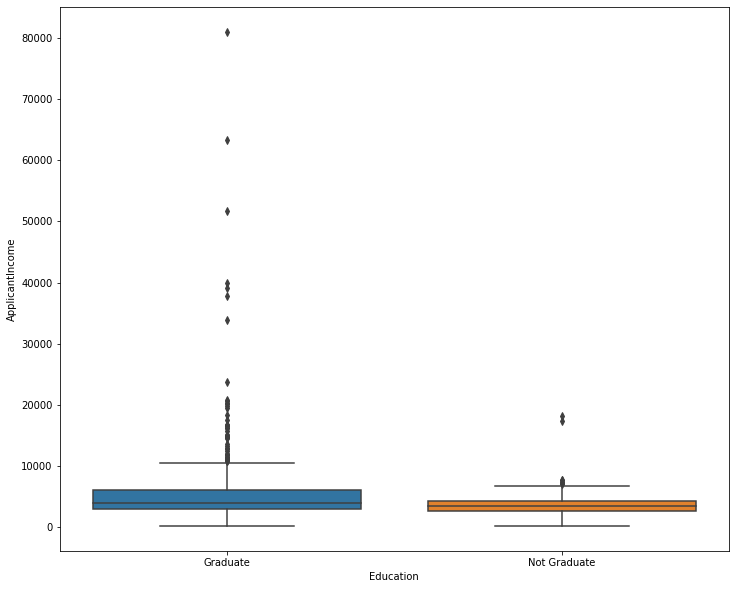

In [3018]:
fig, ax = plt.subplots(figsize=(12,10))
ax = sns.boxplot(x="Education", y="ApplicantIncome",data=data)

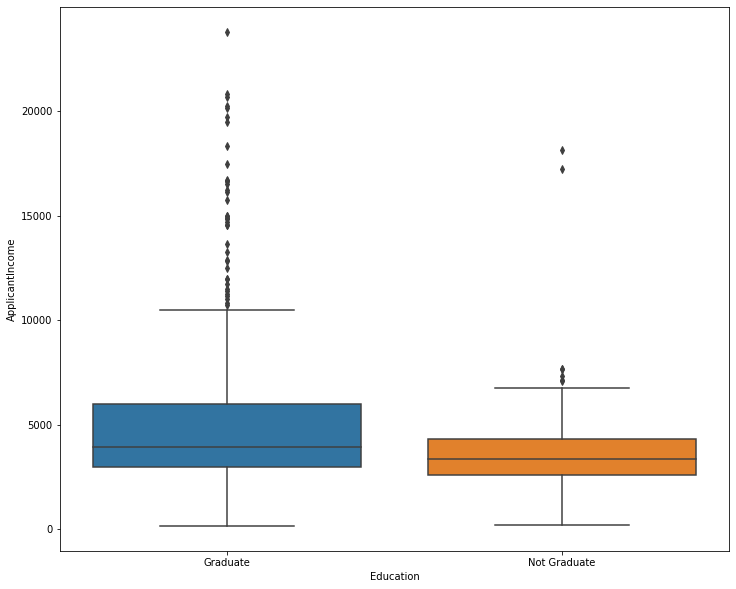

In [3019]:
fig, ax = plt.subplots(figsize=(12,10))
ax = sns.boxplot(x="Education", y="ApplicantIncome",data=data[data['ApplicantIncome']<25000])

Look at the histogram and boxplot of LoanAmount

<AxesSubplot:xlabel='LoanAmount'>

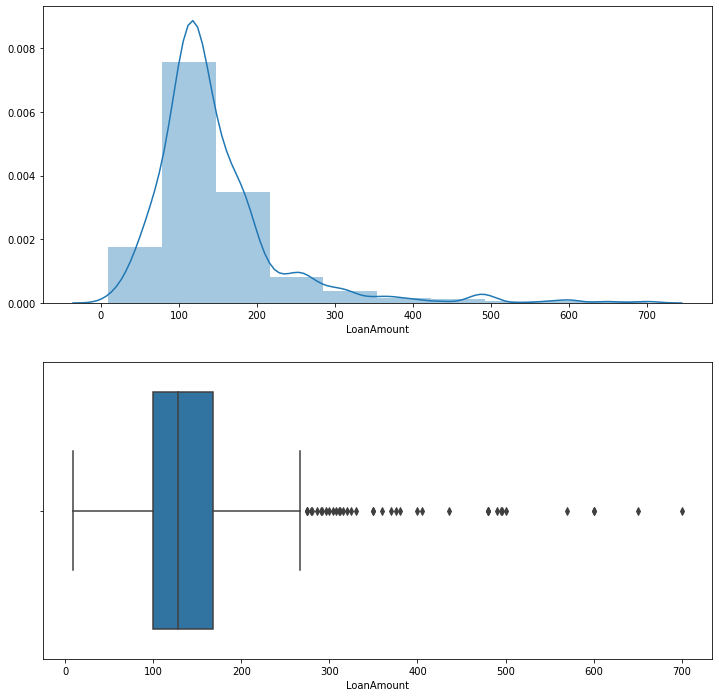

In [3020]:
fig, ax = plt.subplots(2,figsize=(12,12))
sns.distplot(data['LoanAmount'],bins = 10, ax = ax[0])
sns.boxplot(data['LoanAmount'], ax = ax[1])

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [3021]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3023]:
data.groupby('Credit_History').count()['Loan_Status']

Credit_History
0.0     89
1.0    475
Name: Loan_Status, dtype: int64

In [3024]:
table = pd.pivot_table(data, values='ApplicantIncome', index=['Gender', 'Education'])
table

ApplicantIncome
Gender Education                    
Female Graduate          4646.467391
       Not Graduate      4629.700000
Male   Graduate          5992.345745
       Not Graduate      3630.061947

In [3025]:
pd.pivot_table(data, values='ApplicantIncome', index=['Gender', 'Self_Employed'])

ApplicantIncome
Gender Self_Employed                 
Female No                 4071.876404
       Yes                9022.800000
Male   No                 5099.721393
       Yes                7110.126984

In [3026]:
pd.pivot_table(data, values='ApplicantIncome', index=['Gender', 'Married'])

ApplicantIncome
Gender Married                 
Female No           4503.787500
       Yes          4829.645161
Male   No           5236.146154
       Yes          5529.540616

In [3027]:
pd.pivot_table(data, values='ApplicantIncome', index=['Gender', 'Dependents'], aggfunc=np.mean)

ApplicantIncome
Gender Dependents                 
Female 0               4278.100000
       1               6487.894737
       2               4277.857143
       3               1776.333333
Male   0               5119.848837
       1               5793.280488
       2               5015.456522
       3               7719.777778

In [3028]:
pd.pivot_table(data, values='LoanAmount', index=['Gender', 'Education'], aggfunc=np.mean)

LoanAmount
Gender Education               
Female Graduate      129.855556
       Not Graduate  111.736842
Male   Graduate      157.994490
       Not Graduate  119.654206

In [3029]:
table

ApplicantIncome
Gender Education                    
Female Graduate          4646.467391
       Not Graduate      4629.700000
Male   Graduate          5992.345745
       Not Graduate      3630.061947

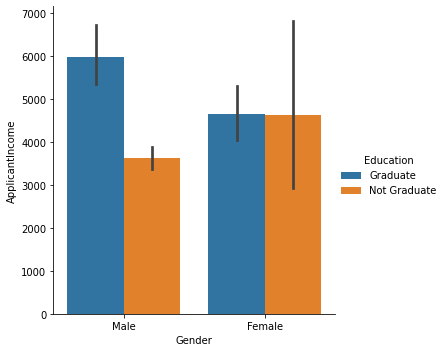

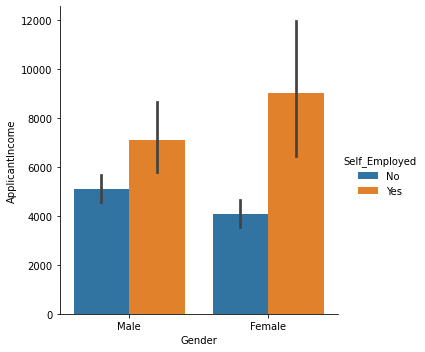

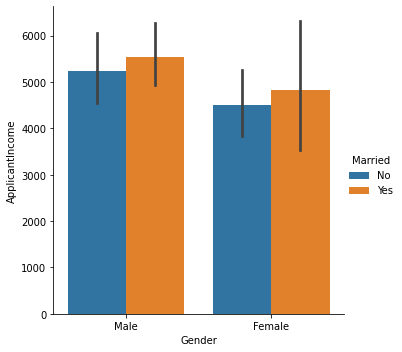

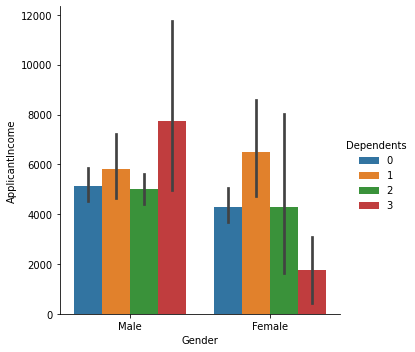

In [3030]:
sns.catplot(x='Gender', y="ApplicantIncome",hue = 'Education',data=data, kind='bar')
sns.catplot(x='Gender', y="ApplicantIncome",hue = 'Self_Employed',data=data, kind='bar')
sns.catplot(x='Gender', y="ApplicantIncome",hue = 'Married',data=data, kind='bar')
sns.catplot(x='Gender', y="ApplicantIncome",hue = 'Dependents',data=data, kind='bar')

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [3031]:
# impute marital with mode
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
# impute gender based on income (Bias!)
data.loc[data['ApplicantIncome']<5446, 'Gender'] = data.loc[data['ApplicantIncome']<5446, 'Gender'].fillna('Female')
data.loc[data['ApplicantIncome']>=5446, 'Gender'] = data.loc[data['ApplicantIncome']>=5446, 'Gender'].fillna('Male')
# impute Loan_amount_term with mean
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
# impute dependents based on marital
data.loc[data['Married']=='Yes', 'Dependents'] = data.loc[data['Married']=='Yes', 'Dependents'].fillna(1)
data.loc[data['Married']=='No', 'Dependents'] = data.loc[data['Married']=='No', 'Dependents'].fillna(0)
# impute loan amount based on income
data.loc[data['ApplicantIncome']<5403, 'LoanAmount'] = data.loc[data['ApplicantIncome']<5403, 'LoanAmount'].fillna(118)
data.loc[data['ApplicantIncome']>=5403, 'LoanAmount'] = data.loc[data['ApplicantIncome']>=5403, 'LoanAmount'].fillna(216)

# impute Self_employed
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
# imputer Credit_history
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [3032]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,216.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

In [3033]:
#data = copy.deepcopy(data[data['ApplicantIncome']<25000])
#data

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Loan_Amount_Term'>

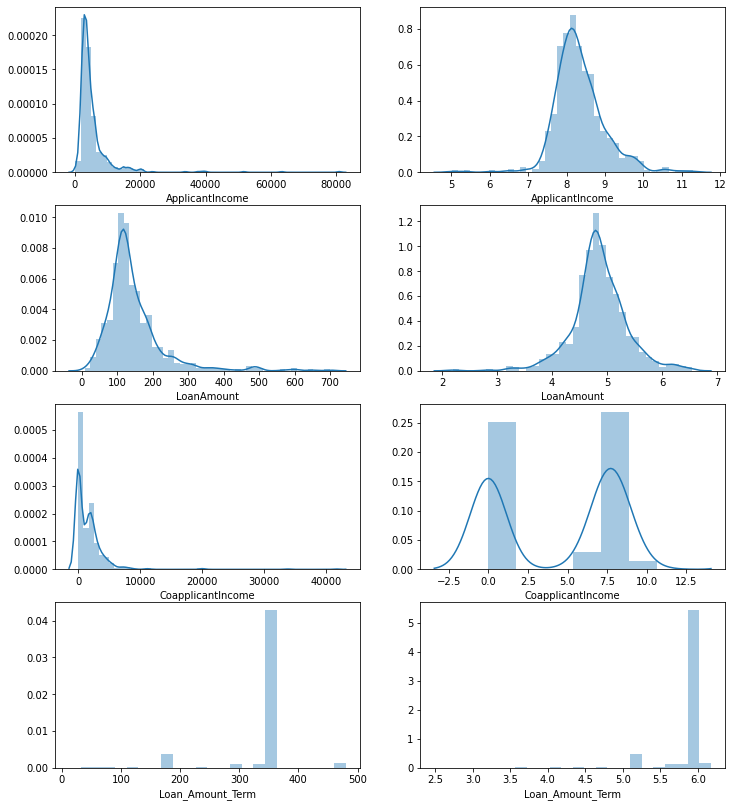

In [3034]:
fig, ax = plt.subplots(4,2,figsize=(12,14))
sns.distplot(data['ApplicantIncome'], ax = ax[0][0])
sns.distplot(data['LoanAmount'], ax = ax[1][0])
sns.distplot(data['CoapplicantIncome'], ax = ax[2][0])
sns.distplot(data['Loan_Amount_Term'], ax = ax[3][0])

sns.distplot(np.log(data['ApplicantIncome']), ax = ax[0][1])
sns.distplot(np.log(data['LoanAmount']), ax = ax[1][1])
sns.distplot(np.log(data['CoapplicantIncome']+1), ax = ax[2][1])
sns.distplot(np.log(data['Loan_Amount_Term']), ax = ax[3][1])

In [3035]:
data['co-applicant'] = np.where(data['CoapplicantIncome']==0,0,1)

In [3036]:
data['log_ApplicantIncome'] = np.log(data['ApplicantIncome'])
data['log_LoanAmount'] = np.log(data['LoanAmount'])

Combine both incomes as total income and take a log transformation of the same.

In [3037]:
data['Total_income'] = data['ApplicantIncome'] + data['CoapplicantIncome'] 
data['log_Total_income'] = np.log(data['Total_income'])

<AxesSubplot:xlabel='log_Total_income'>

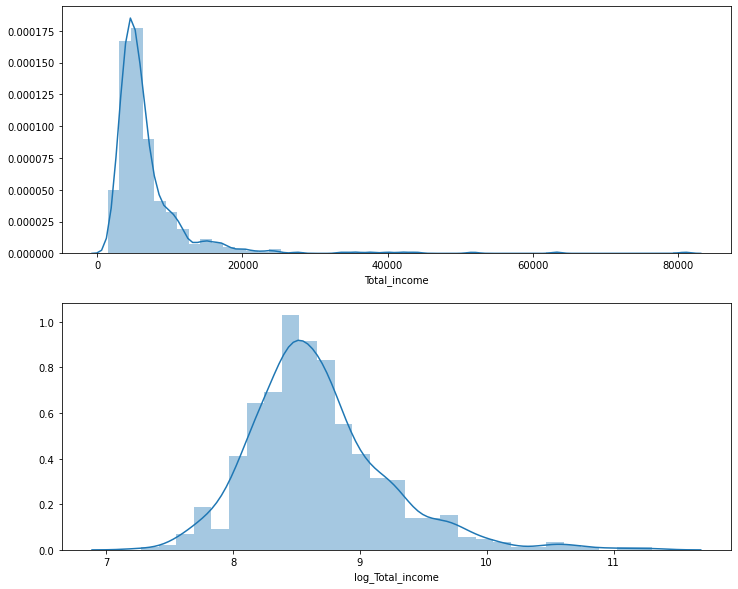

In [3038]:
fig, ax = plt.subplots(2,figsize=(12,10))

sns.distplot(data['Total_income'], ax = ax[0])
sns.distplot(data['log_Total_income'], ax = ax[1])

### split into different dataframes

In [3039]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,co-applicant,log_ApplicantIncome,log_LoanAmount,Total_income,log_Total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,216.0,360.0,1.0,Urban,Y,0,8.674026,5.375278,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,8.430109,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,8.006368,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,7.856707,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,8.699515,4.948760,6000.0,8.699515


In [3040]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'co-applicant', 'log_ApplicantIncome', 'log_LoanAmount', 'Total_income',
       'log_Total_income'],
      dtype='object')

In [3041]:
# 14 columns
data_normal = copy.deepcopy(data.drop(['Loan_ID','ApplicantIncome', 'CoapplicantIncome', 'log_ApplicantIncome', 'LoanAmount', 'Total_income'], axis = 1))
data_normal.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,co-applicant,log_LoanAmount,log_Total_income
0,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,0,5.375278,8.674026
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,N,1,4.852030,8.714568
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,Y,0,4.189655,8.006368
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,Y,1,4.787492,8.505323
4,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,0,4.948760,8.699515


In [3042]:
# 14 columns
data_log = copy.deepcopy(data[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'CoapplicantIncome','Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'log_ApplicantIncome', 'log_LoanAmount','log_Total_income','co-applicant','Loan_Status']])
data_log.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,log_ApplicantIncome,log_LoanAmount,log_Total_income,co-applicant,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.0,360.0,1.0,Urban,8.674026,5.375278,8.674026,0,Y
1,LP001003,Male,Yes,1,Graduate,No,1508.0,360.0,1.0,Rural,8.430109,4.852030,8.714568,1,N
2,LP001005,Male,Yes,0,Graduate,Yes,0.0,360.0,1.0,Urban,8.006368,4.189655,8.006368,0,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2358.0,360.0,1.0,Urban,7.856707,4.787492,8.505323,1,Y
4,LP001008,Male,No,0,Graduate,No,0.0,360.0,1.0,Urban,8.699515,4.948760,8.699515,0,Y


### Standardize

In [3043]:
data_normal.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,co-applicant,log_LoanAmount,log_Total_income
0,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,0,5.375278,8.674026
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,N,1,4.852030,8.714568
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,Y,0,4.189655,8.006368
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,Y,1,4.787492,8.505323
4,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,0,4.948760,8.699515


In [3044]:
to_std = ['log_Total_income', 'log_LoanAmount','Loan_Amount_Term']
to_std_log = ['CoapplicantIncome','Loan_Amount_Term', 'log_ApplicantIncome', 'log_LoanAmount', 'log_Total_income']

In [3045]:
num_std = data_normal[to_std].values
num_scaled = StandardScaler().fit_transform(num_std)

num_std_log = data_log[to_std_log].values
num_scaled_log = StandardScaler().fit_transform(num_std_log)

In [3046]:
for i in range(len(to_std)):
    data_normal[to_std[i]] = num_scaled[:,i]
    
for i in range(len(to_std_log)):
    data_log[to_std_log[i]] = num_scaled_log[:,i]

In [3047]:
data_normal.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,co-applicant,log_LoanAmount,log_Total_income
0,Male,No,0,Graduate,No,0.279851,1.0,Urban,Y,0,1.030500,0.008468
1,Male,Yes,1,Graduate,No,0.279851,1.0,Rural,N,1,-0.018439,0.082903
2,Male,Yes,0,Graduate,Yes,0.279851,1.0,Urban,Y,0,-1.346283,-1.217363
3,Male,Yes,0,Not Graduate,No,0.279851,1.0,Urban,Y,1,-0.147817,-0.301273
4,Male,No,0,Graduate,No,0.279851,1.0,Urban,Y,0,0.175472,0.055266


### correlation

/home/david/.local/lib/python3.8/site-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


<AxesSubplot:>

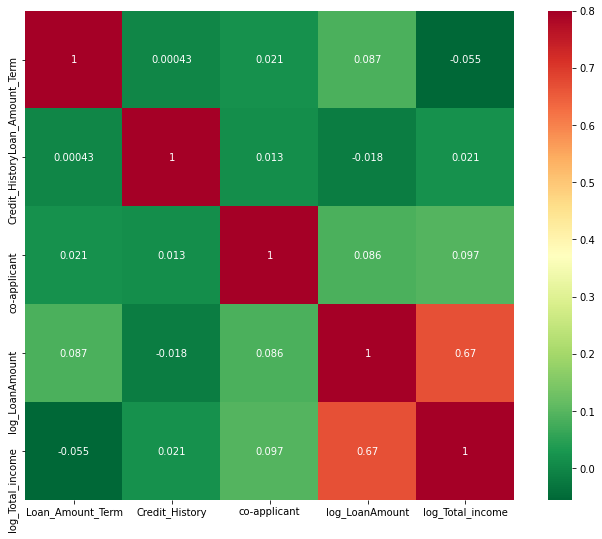

In [3048]:
corrmat = data_normal.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8,annot = True, square=True,cmap="RdYlGn_r")

### Label code

In [3049]:
data_normal.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,co-applicant,log_LoanAmount,log_Total_income
0,Male,No,0,Graduate,No,0.279851,1.0,Urban,Y,0,1.030500,0.008468
1,Male,Yes,1,Graduate,No,0.279851,1.0,Rural,N,1,-0.018439,0.082903
2,Male,Yes,0,Graduate,Yes,0.279851,1.0,Urban,Y,0,-1.346283,-1.217363
3,Male,Yes,0,Not Graduate,No,0.279851,1.0,Urban,Y,1,-0.147817,-0.301273
4,Male,No,0,Graduate,No,0.279851,1.0,Urban,Y,0,0.175472,0.055266


In [3050]:
# for not logged
data_normal['Gender'] = pd.factorize(data_normal['Gender'])[0]
data_normal['Married'] = pd.factorize(data_normal['Married'])[0]
data_normal['Education'] = pd.factorize(data_normal['Education'])[0]
data_normal['Self_Employed'] = pd.factorize(data_normal['Self_Employed'])[0]
data_normal['Property_Area'] = pd.factorize(data_normal['Property_Area'])[0]

In [3051]:
data_normal['Loan_Status'] = np.where(data_normal['Loan_Status']=='Y',1,0)

In [3052]:
# for log data frame
data_log['Gender'] = pd.factorize(data_log['Gender'])[0]
data_log['Married'] = pd.factorize(data_log['Married'])[0]
data_log['Education'] = pd.factorize(data_log['Education'])[0]
data_log['Self_Employed'] = pd.factorize(data_log['Self_Employed'])[0]
data_log['Property_Area'] = pd.factorize(data_log['Property_Area'])[0]

In [3053]:
data_log['Loan_Status'] = np.where(data_log['Loan_Status']=='Y',1,0)

In [3054]:
data_log['Dependents'] = data_log['Dependents'].astype(int)
data_normal['Dependents'] = data_normal['Dependents'].astype(int)

In [3055]:
#data_log['Dependents'] = np.where(data_log['Dependents']==0,0,1)

### feature selection

In [3056]:
data_normal

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,co-applicant,log_LoanAmount,log_Total_income
0,0,0,0,0,0,0.279851,1.0,0,1,0,1.030500,0.008468
1,0,1,1,0,0,0.279851,1.0,1,0,1,-0.018439,0.082903
2,0,1,0,0,1,0.279851,1.0,0,1,0,-1.346283,-1.217363
3,0,1,0,1,0,0.279851,1.0,0,1,1,-0.147817,-0.301273
4,0,0,0,0,0,0.279851,1.0,0,1,0,0.175472,0.055266
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,0,0,0.279851,1.0,1,1,0,-1.199892,-1.279607
610,0,1,3,0,0,-2.518655,1.0,1,1,0,-2.350172,-0.641153
611,0,1,1,0,0,0.279851,1.0,0,1,1,1.347461,0.653699
612,0,1,2,0,0,0.279851,1.0,0,1,0,0.741488,0.485168


In [3057]:
# elbow rule
def plot_distortion(X,label,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o', label = label)
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.legend()

In [3058]:
features = copy.deepcopy(data_normal.drop(['Loan_Status'], axis = 1))

### PCA

In [3059]:
pca = PCA(n_components=11)
pca.fit(features)
features_reduced = pca.fit_transform(features)

In [3060]:
pca.explained_variance_[pca.explained_variance_>1]

array([1.75916882, 1.12082906])

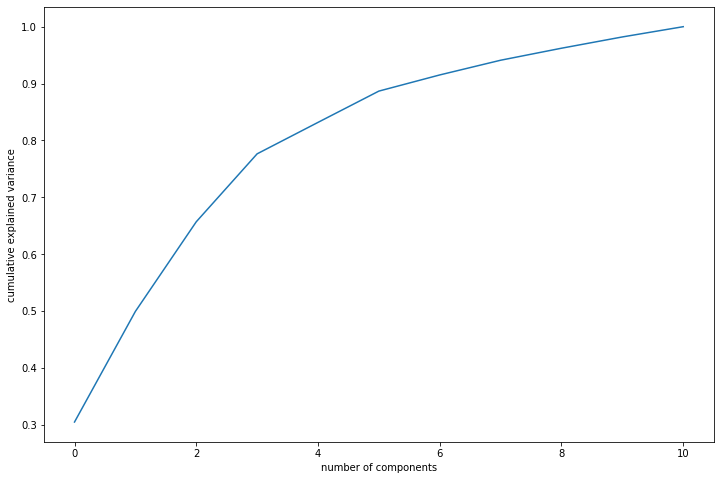

In [3061]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('number of components')
ax.set_ylabel('cumulative explained variance');

In [3062]:
pca = PCA(n_components=2)
pca.fit(features)
features_reduced = pca.fit_transform(features)

In [3063]:
data_PCA_df = pd.DataFrame(features_reduced)
data_PCA_df.columns = ['PC1','PC2']

In [3064]:
data_PCA_df

,PC1,PC2
0,0.379503,-0.761106
1,0.181655,-0.032287
2,-1.890565,-0.081796
3,-0.525303,-0.328828
4,-0.164816,-0.602225
...,...,...
609,-2.021867,-0.468131
610,-1.330485,3.745838
611,1.453880,-0.174016
612,1.164063,0.531022


## 4. Building a Predictive Model

In [3068]:
data.groupby('Credit_History').count()['Loan_Status']

Credit_History
0.0     89
1.0    525
Name: Loan_Status, dtype: int64

In [3069]:
data_normal.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,co-applicant,log_LoanAmount,log_Total_income
0,0,0,0,0,0,0.279851,1.0,0,1,0,1.030500,0.008468
1,0,1,1,0,0,0.279851,1.0,1,0,1,-0.018439,0.082903
2,0,1,0,0,1,0.279851,1.0,0,1,0,-1.346283,-1.217363
3,0,1,0,1,0,0.279851,1.0,0,1,1,-0.147817,-0.301273
4,0,0,0,0,0,0.279851,1.0,0,1,0,0.175472,0.055266


In [3070]:
data_log.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,log_ApplicantIncome,log_LoanAmount,log_Total_income,co-applicant,Loan_Status
0,LP001002,0,0,0,0,0,-0.554487,0.279851,1.0,0,0.516199,1.030500,0.008468,0,1
1,LP001003,0,1,1,0,0,-0.038732,0.279851,1.0,1,0.137879,-0.018439,0.082903,1,0
2,LP001005,0,1,0,0,1,-0.554487,0.279851,1.0,0,-0.519352,-1.346283,-1.217363,0,1
3,LP001006,0,1,0,1,0,0.251980,0.279851,1.0,0,-0.751478,-0.147817,-0.301273,1,1
4,LP001008,0,0,0,0,0,-0.554487,0.279851,1.0,0,0.555733,0.175472,0.055266,0,1


In [3323]:
#X = copy.deepcopy(data_log.drop(['Loan_ID','CoapplicantIncome', 'log_ApplicantIncome', 'Loan_Status'], axis = 1))
#X = copy.deepcopy(data_log.drop(['Loan_ID','log_Total_income', 'Loan_Status', 'co-applicant'], axis = 1))
#X = copy.deepcopy(data_PCA_df)

#using not logged
X = copy.deepcopy(data_normal.drop(['Loan_Status'], axis = 1))
#X = copy.deepcopy(data_normal.drop(['Gender','', 'Loan_Status'], axis = 1))

y = copy.deepcopy(data_normal['Loan_Status'])

In [3324]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

### Naive Bayes

In [3387]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
probs = gnb.predict_proba(X_test)

In [3388]:
metrics.confusion_matrix(y_test,y_pred)

array([[ 29,  27],
       [  1, 128]])

In [3389]:
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))

0.8486486486486486
0.8258064516129032
0.9922480620155039


In [3390]:
roc_auc_score(y_test, y_pred)

0.7550526024363233

In [3394]:
# adjusting threshold
my_y = []
for i in probs:
    if(i[0]>0.60):
        my_y.append(0)
    else:
        my_y.append(1)

In [3416]:
print(metrics.accuracy_score(y_test,my_y))
print(metrics.precision_score(y_test,my_y))
print(metrics.recall_score(y_test,my_y))
print(metrics.f1_score(y_test,my_y))

0.8324324324324325
0.8223684210526315
0.9689922480620154
0.8896797153024911


In [3396]:
roc_auc_score(y_test, my_y)

0.7461240310077519

### xgb classifier

In [3414]:
#scale_weight_1 = 422/192
#scale_weight_1 = 192/422

In [3365]:
xg_class = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.1, gamma=0.1,
              gpu_id=-1, importance_type='gain', learning_rate=0.100000001, max_delta_step=0, max_depth=2,
              min_child_weight=1, n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [3366]:
xg_class.fit(X_train,y_train)
y_pred = xg_class.predict(X_test)
probs = xg_class.predict_proba(X_test)

In [3367]:
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))

0.8378378378378378
0.8235294117647058
0.9767441860465116


In [3368]:
roc_auc_score(y_test, y_pred)

0.7473006644518272

In [3384]:
# adjusting threshold
my_y = []
for i in probs:
    if(i[0]>0.55):
        my_y.append(0)
    else:
        my_y.append(1)

In [3385]:
print(metrics.accuracy_score(y_test,my_y))
print(metrics.precision_score(y_test,my_y))
print(metrics.recall_score(y_test,my_y))

0.8432432432432433
0.8246753246753247
0.9844961240310077


In [3386]:
roc_auc_score(y_test, my_y)

0.7511766334440753

### Random Forest

In [3398]:
rf = RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3).fit(X_train,y_train)
y_pred = rf.predict(X_test)
probs = rf.predict_proba(X_test)

In [3399]:
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))

0.8378378378378378
0.8193548387096774
0.9844961240310077


In [3400]:
roc_auc_score(y_test, y_pred)

0.7422480620155039

In [3407]:
# adjusting threshold
my_y = []
for i in probs:
    if(i[0]>0.40):
        my_y.append(0)
    else:
        my_y.append(1)

In [3408]:
print(metrics.accuracy_score(y_test,my_y))
print(metrics.precision_score(y_test,my_y))
print(metrics.recall_score(y_test,my_y))

0.8324324324324325
0.8223684210526315
0.9689922480620154


In [3409]:
roc_auc_score(y_test, my_y)

0.743424695459579

### Bagging classifier

In [3163]:
gnb = GaussianNB()

In [3164]:
bag = BaggingClassifier(base_estimator=gnb, n_estimators=10)
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)

In [3165]:
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))

0.8594594594594595
0.8562091503267973
0.9703703703703703


In [3166]:
roc_auc_score(y_test, y_pred)

0.7651851851851852

### ExtraTree

In [3167]:
et = ExtraTreesClassifier()
et.fit(X_train,y_train)
y_pred = et.predict(X_test)

In [3168]:
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.precision_score(y_test,y_pred))
print(metrics.recall_score(y_test,y_pred))

0.827027027027027
0.8652482269503546
0.9037037037037037


In [3169]:
roc_auc_score(y_test, y_pred)

0.7618518518518518

In [ ]:
# Adaboost, Dicision Tree, logistic, multinomial log, SVM (rbf, poly) 

In [ ]:
# BootStrapping
# iterations = 100
# for i in range(iterations):
#     x_boot = not_0.sample(count_class_1)
#     new_data = pd.concat([x_boot, not_1], axis=0)
#     new_data = new_data.sample(frac=1).reset_index(drop=True)
#     x_train = new_data.drop('Class', axis = 1)
#     y_train = new_data['Class']
    
#     if i == 0:
#         gnb = GaussianNB()
#         gnb.fit(x_train, y_train) 
#         sum_y_pred = gnb.predict(X_test)
#         sum_y_proba = gnb.predict_proba(X_test)
#     else:
#         gnb = GaussianNB()
#         gnb.fit(x_train, y_train) 
#         sum_y_pred += gnb.predict(X_test)
#         sum_y_proba += gnb.predict_proba(X_test)

### HyperParam tuning

Try paramater grid search to improve the results

In [1478]:
xg_class = xgb.XGBClassifier()
gnb = GaussianNB()
rf = RandomForestClassifier()

In [1479]:
params = {
    'max_depth': [2,5,6,9],
    'n_estimators': [10,50,100,150],
    'eta': [0.1, 0.03, 0.05, 0.3],
    'colsample_bytree' : [0.5, 0.8, 1],
    'gamma': [0.1, 0, 0.05]
}

In [1480]:
cv = GridSearchCV(estimator=xg_class, param_grid=params, n_jobs=-1)
cv.fit(X_train, y_train) 

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [1481]:
print('Best score for data1:', cv.best_score_) 

Best score for data1: 0.7950478796169631


In [1482]:
cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.1, gamma=0.1,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.100000001, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [3191]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [3192]:
class DataframeFunctionTransformer():
    def __init__(self, func):
        self.func = func

    def transform(self, input_df, **transform_params):
        return self.func(input_df)

    def fit(self, X, y=None, **fit_params):
        return self

### Split data

In [3193]:
data_pipe = pd.read_csv("data.csv", header = 0)
data_pipe['Loan_Status'] = np.where(data_pipe['Loan_Status']=='Y',1,0)

In [3194]:
y = data_pipe['Loan_Status']
df = data_pipe.drop(['Loan_Status', 'Loan_ID'], axis = 1)

In [3195]:
df_train = df.sample(frac=0.8).sort_index()
y_train = y[y.index.isin(df_train.index.tolist())]

df_test = df[~df.index.isin(df_train.index.tolist())].sort_index()
y_test = y[y.index.isin(df_test.index.tolist())]

In [3196]:
num_feats = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
cat_feats = df.dtypes[~df.dtypes.index.isin(num_feats)].index.tolist()

### 1)

In [3197]:
def numFeat(data):
    return data[num_feats]

def catFeat(data):
    return data[cat_feats]

In [3198]:
keep_num = FunctionTransformer(numFeat)
keep_cat = FunctionTransformer(catFeat)

### 2)

In [3199]:
null_replace_num = SimpleImputer(strategy="mean") 
null_replace_cat = SimpleImputer(strategy="most_frequent")

### 3)

In [3200]:
logging = FunctionTransformer(np.log1p)

### 4)

In [3201]:
ohe = OneHotEncoder()

In [3202]:
class ToDenseTransformer():

    def transform(self, X, y=None, **fit_params):
        return X.todense()

    def fit(self, X, y=None, **fit_params):
        return self

In [3203]:
to_dense = ToDenseTransformer()
pca = PCA(n_components = 6)

### 5)

In [3204]:
std_df = StandardScaler() 
#std_df = FunctionTransformer(standardizing)

### 6)

In [3205]:
base_model = GaussianNB()

In [3206]:
pipe_num = Pipeline([('num_feats',keep_num),('null_replace_num',null_replace_num),('logging',logging), ('standardize',std_df)])                  
pipe_cat = Pipeline([('cat_feats',keep_cat),('null_replace_cat',null_replace_cat),('OneHotEncoder', ohe),('dense',to_dense),('PCA', pca)])
#pipe_cat = Pipeline([('cat_feats',keep_cat),('null_replace_cat',null_replace_cat),('OneHotEncoder', ohe),('dense',to_dense)])

In [3207]:
pipe_concat = FeatureUnion([('num',pipe_num), ('cat',pipe_cat)])

In [3208]:
pipe_main = Pipeline([('pipes',pipe_concat),('model',base_model)])

In [3209]:
pipe_main.fit(df_train,y_train)

Pipeline(steps=[('pipes',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('num_feats',
                                                                  FunctionTransformer(func=<function numFeat at 0x7f4ff11f8c10>)),
                                                                 ('null_replace_num',
                                                                  SimpleImputer()),
                                                                 ('logging',
                                                                  FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                 ('standardize',
                                                                  StandardScaler())])),
                                                ('cat',
                                                 Pipeline(steps=[('cat_feats',
                                               

### Hyper param (PCA)

In [3210]:
cat_features_to_test = np.arange(1, 8)

In [3211]:
params = {'pipes__cat__PCA__n_components': cat_features_to_test}

In [3212]:
gridsearch = GridSearchCV(pipe_main, params, verbose=1).fit(df_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.7s finished


In [3213]:
gridsearch.best_params_

{'pipes__cat__PCA__n_components': 7}

### Gridsearch different models

In [3214]:
gnb = GaussianNB()
xgb_class = xgb.XGBClassifier()
rf_class = RandomForestClassifier()
model_to_test = [gnb, xgb_class, rf_class]

In [3215]:
model_params = {'model': model_to_test}

In [3216]:
model_gridsearch = GridSearchCV(pipe_main, model_params, verbose=1).fit(df_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.1s finished


In [3217]:
model_gridsearch.best_params_

{'model': GaussianNB()}

### Hyper param NaiveBayes

In [2285]:
gnb = GaussianNB(var_smoothing = 1e-9)
smoothing = [1e-9, 1e-8, 1e-10]

In [2286]:
hyper_params = {'model__var_smoothing': smoothing}

In [2287]:
hyper_gridsearch = GridSearchCV(pipe_main, hyper_params, verbose=1).fit(df_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.3s finished


In [2288]:
hyper_gridsearch.best_params_

{'model__var_smoothing': 1e-09}

### Optimal model

In [3218]:
gnb = GaussianNB(var_smoothing = 1e-9)

In [3219]:
pipe_main = Pipeline([('pipes',pipe_concat),('model',gnb)])

In [3220]:
pipe_main.fit(df_train,y_train)

Pipeline(steps=[('pipes',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('num_feats',
                                                                  FunctionTransformer(func=<function numFeat at 0x7f4ff11f8c10>)),
                                                                 ('null_replace_num',
                                                                  SimpleImputer()),
                                                                 ('logging',
                                                                  FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                 ('standardize',
                                                                  StandardScaler())])),
                                                ('cat',
                                                 Pipeline(steps=[('cat_feats',
                                               

In [3221]:
preds = pipe_main.predict(df_test)

In [3222]:
pipe_main.score(df_test,y_test)

0.7479674796747967

### Pickling

In [3223]:
pickle.dump(pipe_main, open( "project_IV.p", "wb" ) )

In [3224]:
pickle.load( open("project_IV.p", 'rb'))

Pipeline(steps=[('pipes',
                 FeatureUnion(transformer_list=[('num',
                                                 Pipeline(steps=[('num_feats',
                                                                  FunctionTransformer(func=<function numFeat at 0x7f4ff11f8c10>)),
                                                                 ('null_replace_num',
                                                                  SimpleImputer()),
                                                                 ('logging',
                                                                  FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                 ('standardize',
                                                                  StandardScaler())])),
                                                ('cat',
                                                 Pipeline(steps=[('cat_feats',
                                               

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [3225]:
import json
import requests

In [3226]:
# dat = {
#         "Gender": [1], 
#         "Married":[1], 
#         "Dependents":[1], 
#         "Education":[1], 
#         "Self_Employed":[0], 
#         "ApplicantIncome":[10000], 
#         "CoapplicantIncome":[1], 
#         "LoanAmount": [200.0], 
#         "Loan_Amount_Term": [360.0], 
#         "Credit_History": [0], 
#         "Property_Area": [1]
# }

In [3329]:
#dat = X.iloc[0].to_dict()

In [3447]:
dat = {
        "Gender": ['Male'], 
        "Married":['Yes'], 
        "Dependents":['1'], 
        "Education":['Graduate'], 
        "Self_Employed":['No'], 
        "ApplicantIncome":[1000], 
        "CoapplicantIncome":[100], 
        "LoanAmount": [100.0], 
        "Loan_Amount_Term": [360.0], 
        "Credit_History": [1], 
        "Property_Area": ['Urban']       #['Urban' 'Rural' 'Semiurban']
}

In [3448]:
df = pd.DataFrame.from_dict(dat)
json_data = df.to_json(orient = 'records')[1:-1].replace('},{','} {')
json_data =json.loads(json_data)

In [3449]:
URL1 = "http://127.0.0.1:5000/proba"
URL2 = "http://127.0.0.1:5000/status"
r1 = requests.post(url = URL1, json = json_data)
r2 = requests.post(url = URL2, json = json_data)

In [3450]:
print(r1)
print(r1.json())

<Response [200]>
[[0.1380963766222401, 0.8619036233777594]]


In [3451]:
print(r2)
print(r2.json())

<Response [200]>
[1]


### AWS_CLI, AWS S3